In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banana/banana_quality.csv


In [2]:
df = pd.read_csv('/kaggle/input/banana/banana_quality.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [4]:
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [5]:
df.describe(include='all')

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4006
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725,NaN
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467,NaN
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977,NaN
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450,NaN
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735,NaN
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063,NaN


<Axes: >

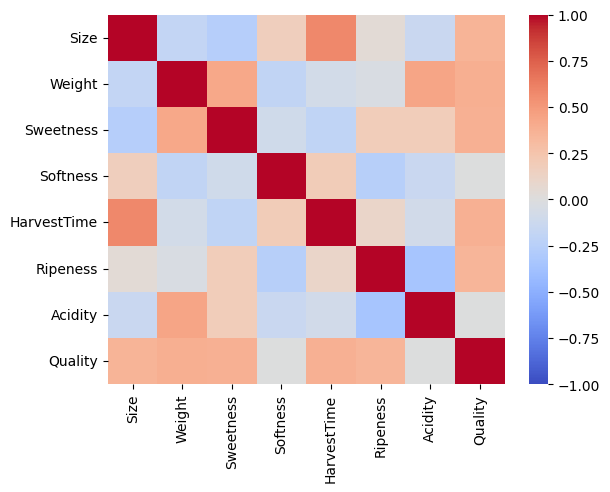

In [46]:
sns.heatmap(df.select_dtypes(exclude='object').corr(),cmap='coolwarm',vmax=1,vmin=-1,center=0)

In [17]:
df.Quality = df.Quality.astype('category')
df.Quality = df.Quality.map({'Good':1,'Bad':0})

In [43]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
X=df[df.columns[:-1]]
y = df[df.columns[-1]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=40)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8765

Model is 87.6% accurate when predicting the quality of bananas

In [44]:
confusion_matrix(y_pred,y_test)

array([[892, 104],
       [143, 861]])

In a binary classification task, a confusion matrix is a table that describes the performance of a classification algorithm. The entries of the matrix are as follows:

True Positive (TP): 892 (Instances where the model correctly predicted the positive class)
False Positive (FP): 104 (Instances where the model incorrectly predicted the positive class)
False Negative (FN): 143 (Instances where the model incorrectly predicted the negative class)
True Negative (TN): 861 (Instances where the model correctly predicted the negative class)